https://github.com/liaochunyang/PIC16/tree/main/PIC16A/data

group statement

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd


from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import chi2
from sklearn.svm import SVC  # SVC is for Support Vector Classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap



# Part one: Data Import and Cleaning

In [2]:
url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16A/data/palmer_penguins.csv"
penguins = pd.read_csv(url)
display(penguins.head())

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [3]:
# Drop unnecessary columns
print("Columns before", penguins.columns)
penguins = penguins.drop(columns=['studyName', 'Sample Number', 'Stage', 'Date Egg', 'Comments', 'Individual ID', 'Region', 'Clutch Completion'])
print("Columns after", penguins.columns)

Columns before Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')
Columns after Index(['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)'],
      dtype='object')


We dropped these columns because they do not contribute meaningful information to our machine learning model. Features like studyName, Sample Number, and Individual ID are unique identifiers that do not help in species classification. Columns like Stage, Date Egg and Clutch Completion relate to reproductive or temporal data, which are not relvant for distinguishing species. Additionally, Comments contains unstructured text, and Region may be redundant if Islan already captures geographic variation.

In [4]:
# Split dataset into training and test set before cleaning
X = penguins.drop(columns=['Species'])  # Features
y = penguins['Species']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split sizes
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")
print(train_test_split(X, y, test_size=0.2, random_state=42))

Training set: (275, 8), Testing set: (69, 8)
[        Island  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
66      Biscoe                35.5               16.2                195.0   
229     Biscoe                46.8               15.4                215.0   
7    Torgersen                39.2               19.6                195.0   
140      Dream                40.2               17.1                193.0   
323     Biscoe                49.1               15.0                228.0   
..         ...                 ...                ...                  ...   
188      Dream                47.6               18.3                195.0   
71   Torgersen                39.7               18.4                190.0   
106     Biscoe                38.6               17.2                199.0   
270     Biscoe                46.6               14.2                210.0   
102     Biscoe                37.7               16.0                183.0   

     Body Mass (g

In [5]:
# Data cleaning fucntion
def clean_data(df):
  """
  Clean the penguin dataset by handling missing variables, converting blank spaces to NaN and replacing then with 0,
  encoding categorical variables and ensuring numerical data types.

  Args:
  df: unclean dataset
  Return:
  df: cleaned dataset
  """
  df = df.copy()

  # Filling missing numeric values with 0
  numeric_cols = df.select_dtypes(include='number').columns
  df[numeric_cols] = df[numeric_cols].fillna(0)

  # Convert blank strings to NaN, then replace with 0
  df.replace(r'^\s*$', 0, regex=True, inplace=True)

  # Encode categorical data
  if "Island" in df.columns:
    df["Island"] = LabelEncoder().fit_transform(df["Island"])

  if "Sex" in df.columns:
    df["Sex"] = LabelEncoder().fit_transform(df["Sex"])

  return df



We created the clean_data function to clean the raw penguins data to ensure that the dataset is clean and properly formated for the data analysis and models. We filled in missing numeric values with 0 to prevent error in calculations and replaced blanks spaces with 0 to ensure consistency. We also used a LabelEncoder() to convert the categorical features (Island, Sex) into numerical values, which makes them usable for machine learning models.

In [6]:
# apply cleaning separately to training and test sets
X_train_cleaned = clean_data(X_train)
X_test_cleaned = clean_data(X_test)

# Encode Target variable
y_train_encoded = LabelEncoder().fit_transform(y_train)
y_test_encoded = LabelEncoder().fit_transform(y_test)



Part 2: Exploratory Analysis


In [7]:
# creating a new DataFrame that removes rows where any of the specified columns have missing values (NaN)
penguins1 = penguins.dropna(subset=["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Species"])

# creates a dictionary that maps penguin species to colors, used for coloring data points in a plot
species_colors = {"Adelie Penguin (Pygoscelis adeliae)": "blue",
                  "Chinstrap penguin (Pygoscelis antarctica)": "green",
                  "Gentoo penguin (Pygoscelis papua)": "red"}


This code provides a quick overview of the numerical features in the dataset

In [8]:
# Compute summary statistics for numerical columns
summary_stats = X_train_cleaned.describe()
print("Summary Statistics:")
print(summary_stats)
print(' ')

Summary Statistics:
           Island  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
count  275.000000          275.000000         275.000000           275.000000   
mean     0.643636           43.678545          17.001818           200.443636   
std      0.717549            6.105288           2.230290            18.728163   
min      0.000000            0.000000           0.000000             0.000000   
25%      0.000000           39.000000          15.300000           190.000000   
50%      1.000000           44.100000          17.200000           197.000000   
75%      1.000000           48.450000          18.600000           214.000000   
max      2.000000           59.600000          21.500000           231.000000   

       Body Mass (g)         Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
count     275.000000  275.000000         275.000000         275.000000  
mean     4187.636364    0.538182           8.375679         -24.767021  
std       841.784500    0.55483

This code compares average penguin measurements across different islands and species

In [9]:
# Compute group-wise statistics for categorical columns
grouped_table = penguins.groupby(["Island", "Species"]).agg({
    "Culmen Length (mm)": "mean",
    "Culmen Depth (mm)": "mean",
    "Flipper Length (mm)": "mean",
    "Body Mass (g)": "mean"
}).reset_index()
print("Grouped Summary by Island and Species:")
print(grouped_table)
print(' ')

Grouped Summary by Island and Species:
      Island                                    Species  Culmen Length (mm)  \
0     Biscoe        Adelie Penguin (Pygoscelis adeliae)           38.975000   
1     Biscoe          Gentoo penguin (Pygoscelis papua)           47.504878   
2      Dream        Adelie Penguin (Pygoscelis adeliae)           38.501786   
3      Dream  Chinstrap penguin (Pygoscelis antarctica)           48.833824   
4  Torgersen        Adelie Penguin (Pygoscelis adeliae)           38.950980   

   Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  
0          18.370455           188.795455    3709.659091  
1          14.982114           217.186992    5076.016260  
2          18.251786           189.732143    3688.392857  
3          18.420588           195.823529    3733.088235  
4          18.429412           191.196078    3706.372549  
 


This code creates a summary table showing how many penguins of each species are found on each island in the dataset.

In [10]:
#Count of penguins per species and island
species_island_count = penguins.groupby(["Species", "Island"]).size().reset_index(name="Count")
print("Penguin Count by Species and Island:")
print(species_island_count)
print(' ')


Penguin Count by Species and Island:
                                     Species     Island  Count
0        Adelie Penguin (Pygoscelis adeliae)     Biscoe     44
1        Adelie Penguin (Pygoscelis adeliae)      Dream     56
2        Adelie Penguin (Pygoscelis adeliae)  Torgersen     52
3  Chinstrap penguin (Pygoscelis antarctica)      Dream     68
4          Gentoo penguin (Pygoscelis papua)     Biscoe    124
 


The scatterplot outputed helps us understand the physial differences between penguin species and how these characteristics relate to each other.

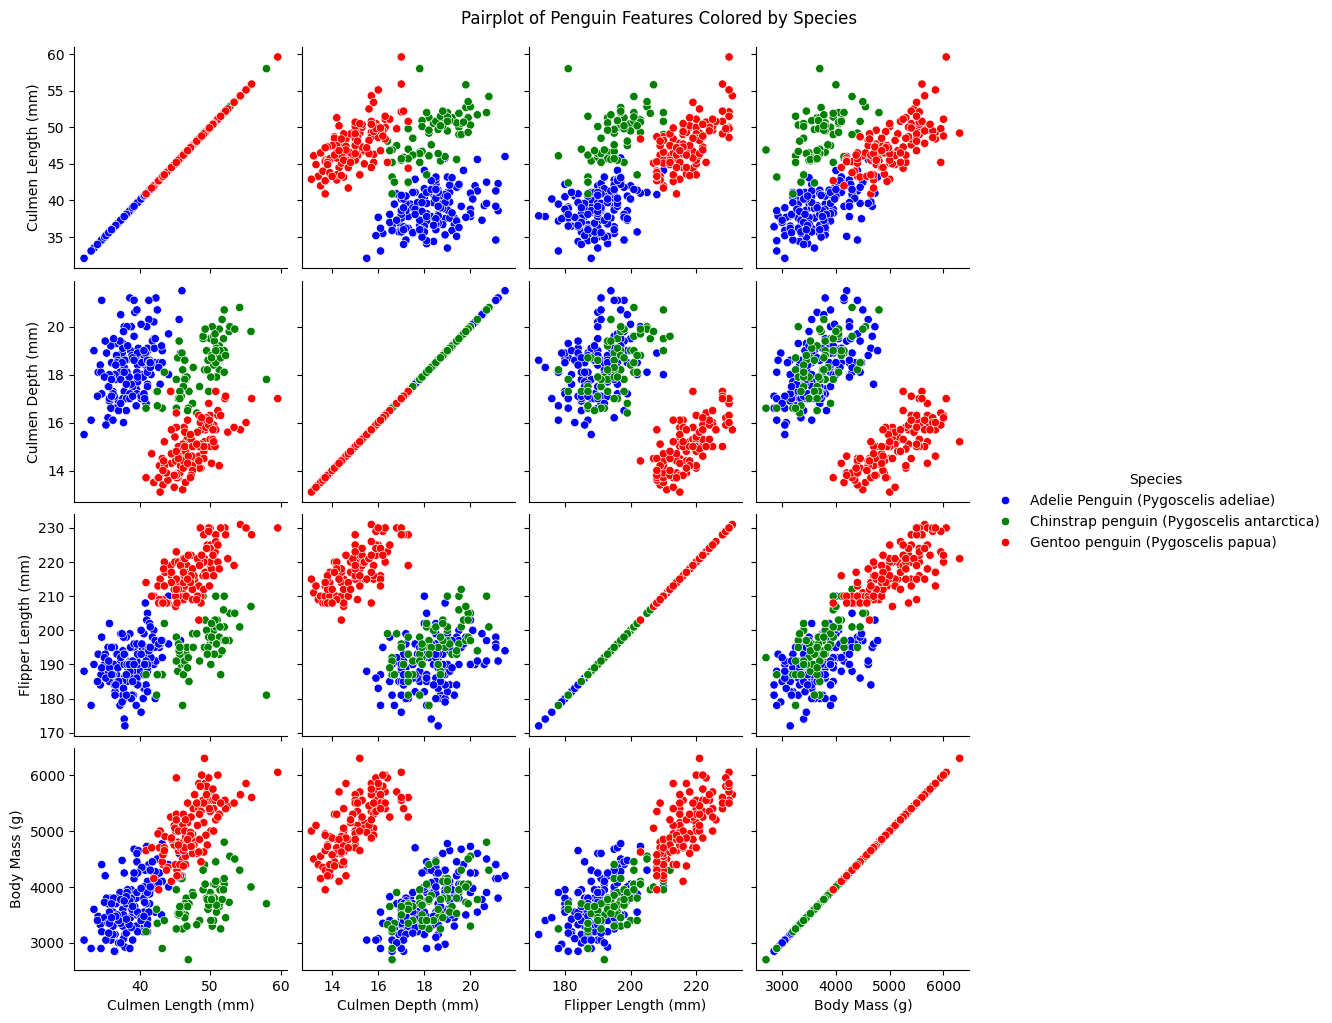


ANOVA Results (Feature differences across Species):
Culmen Length (mm): F=410.60, p=0.0000
Culmen Depth (mm): F=359.79, p=0.0000
Flipper Length (mm): F=594.80, p=0.0000
Body Mass (g): F=343.63, p=0.0000


In [12]:
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant numerical features for correlation analysis
numerical_features = ["Culmen Length (mm)", "Culmen Depth (mm)",
                      "Flipper Length (mm)", "Body Mass (g)"]

# Pairplot visualization without diagonal plots
sns.pairplot(penguins1, vars=numerical_features, hue="Species",
             palette=species_colors, diag_kind=None)

# Show the plot
plt.suptitle("Pairplot of Penguin Features Colored by Species", y=1.02)
plt.show()

# Run ANOVA for each feature
print("\nANOVA Results (Feature differences across Species):")
for feature in numerical_features:
    groups = [penguins1[penguins1["Species"] == species][feature].dropna()
              for species in penguins1["Species"].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"{feature}: F={f_stat:.2f}, p={p_val:.4f}")

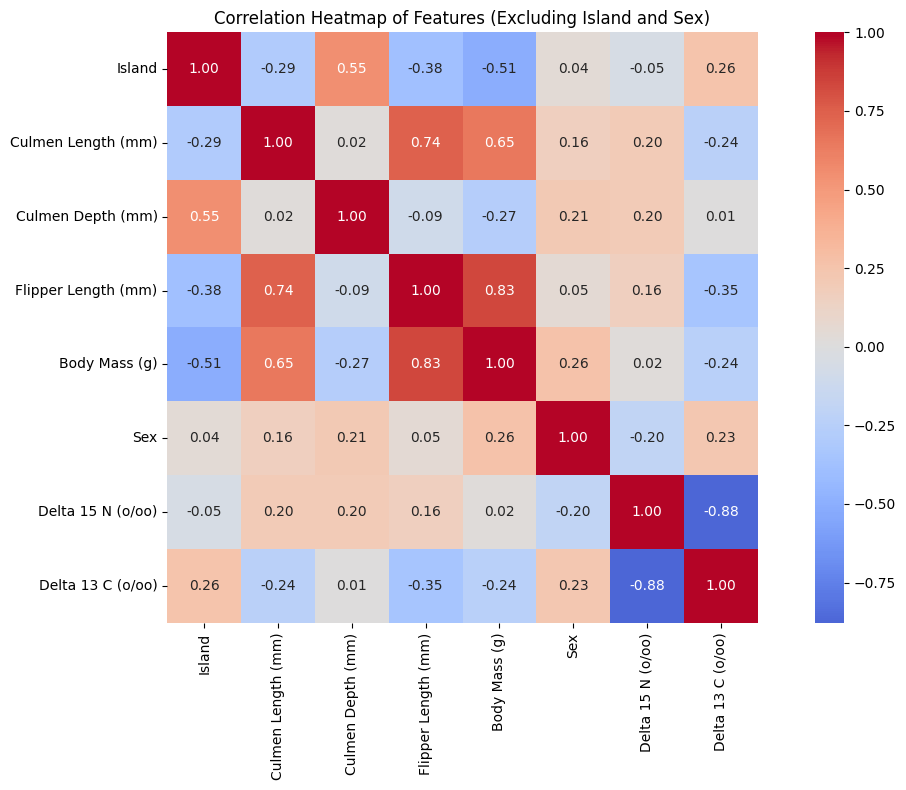


Highest Correlations:
Body Mass (g)        Flipper Length (mm)    0.832758
Flipper Length (mm)  Culmen Length (mm)     0.739201
Body Mass (g)        Culmen Length (mm)     0.651208
Culmen Depth (mm)    Island                 0.551611
Sex                  Body Mass (g)          0.263766
Delta 13 C (o/oo)    Island                 0.259085
                     Sex                    0.232157
Sex                  Culmen Depth (mm)      0.210378
Delta 15 N (o/oo)    Culmen Length (mm)     0.197940
                     Culmen Depth (mm)      0.196888
dtype: float64


In [13]:

# Create correlation matrix
correlation_matrix = X_train_cleaned.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix,
            annot=True,      # Show correlation values
            cmap='coolwarm', # Color scheme
            center=0,        # Centers the colormap at 0
            fmt='.2f',       # Format correlation values to 2 decimal places
            square=True)     # Make the plot square-shaped

plt.title('Correlation Heatmap of Features (Excluding Island and Sex)')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Print highest correlations
print("\nHighest Correlations:")
# Get the upper triangle of correlations
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# Find index of feature pairs with highest correlation
sorted_correlations = upper.unstack().sort_values(ascending=False)
print(sorted_correlations[0:10])  # Print top 10 correlations

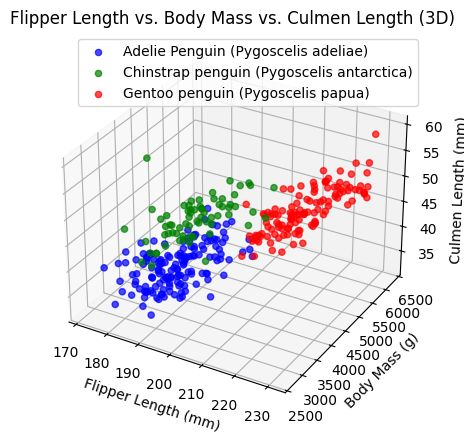

In [14]:
# 3D Scatter Plot: Flipper Length vs. Body Mass, colored by Species
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

for species, color in species_colors.items():
    subset = penguins1[penguins1["Species"] == species]
    ax.scatter(subset["Flipper Length (mm)"], subset["Body Mass (g)"], subset["Culmen Length (mm)"], color=color, label=species, alpha=0.7)

ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Body Mass (g)")
ax.set_zlabel("Culmen Length (mm)")
ax.set_title("Flipper Length vs. Body Mass vs. Culmen Length (3D)")
ax.legend()

plt.show()

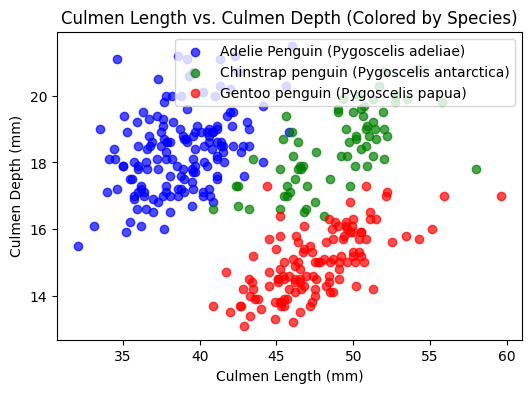

In [15]:
# Scatter plot: Culmen Length vs. Culmen Depth (colored by Species)
plt.figure(figsize=(6, 4))
for species, color in species_colors.items():
    subset = penguins1[penguins1["Species"] == species]
    plt.scatter(subset["Culmen Length (mm)"], subset["Culmen Depth (mm)"], color=color, label=species, alpha=0.7)

plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.title("Culmen Length vs. Culmen Depth (Colored by Species)")
plt.legend()
plt.show()

This scatter plot shows that for the Adelie Penguins have a shorter culmen length, but a longer culmen depth. For Chinstrap penguins, thier culmen length is longer than the Adelie, but that have about the same culmen depth. Lastly for Gentoo Penguins, they have about the same culmen length as the Chinstrap, but have the smallest culmen depth out of all three of the species. With this analysis, we can see that using culmen depth and culmen length are good quantitative features to use for the training model.

/tmp/ipython-input-3102312257.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=species_list)
/tmp/ipython-input-3102312257.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=species_list)
/tmp/ipython-input-3102312257.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=species_list)
/tmp/ipython-input-3102312257.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=species_li

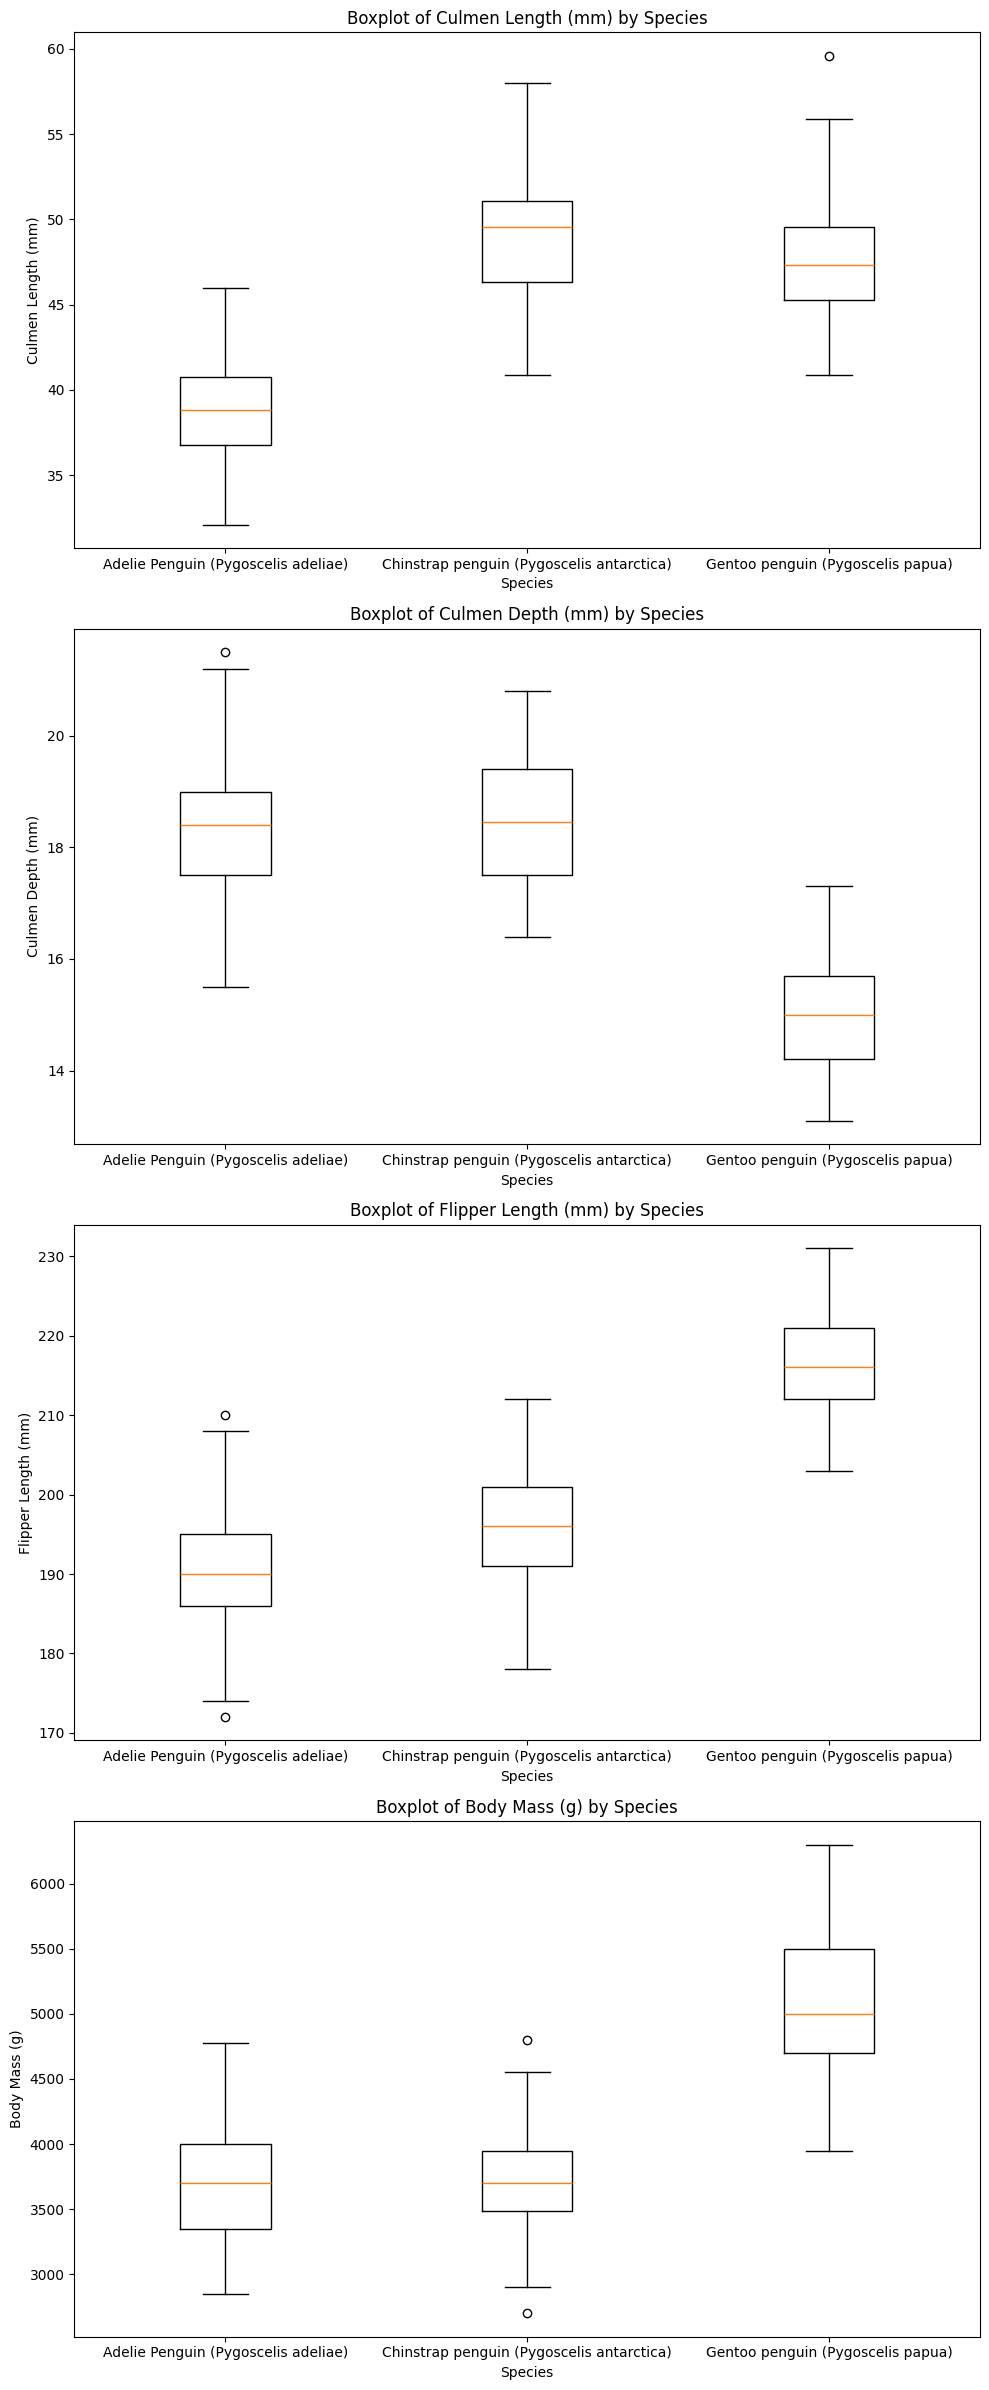

In [16]:
# VISUALIZATION 2: BOXPLOTS

# List of quantitative features
quantitative_features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']

# List of species
species_list = penguins['Species'].unique()

# Create a figure with subplots for each quantitative feature
fig, axes = plt.subplots(len(quantitative_features), 1, figsize=(10, 6 * len(quantitative_features)))

# If there's only one quantitative feature, axes will not be an array, so we wrap it in a list
if len(quantitative_features) == 1:
    axes = [axes]

# Loop through each quantitative feature and create boxplots
for i, feature in enumerate(quantitative_features):
    # Create a boxplot for each species
    data = [penguins[penguins['Species'] == species][feature].dropna() for species in species_list]
    axes[i].boxplot(data, labels=species_list)
    axes[i].set_title(f"Boxplot of {feature} by Species")
    axes[i].set_xlabel("Species")
    axes[i].set_ylabel(feature)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

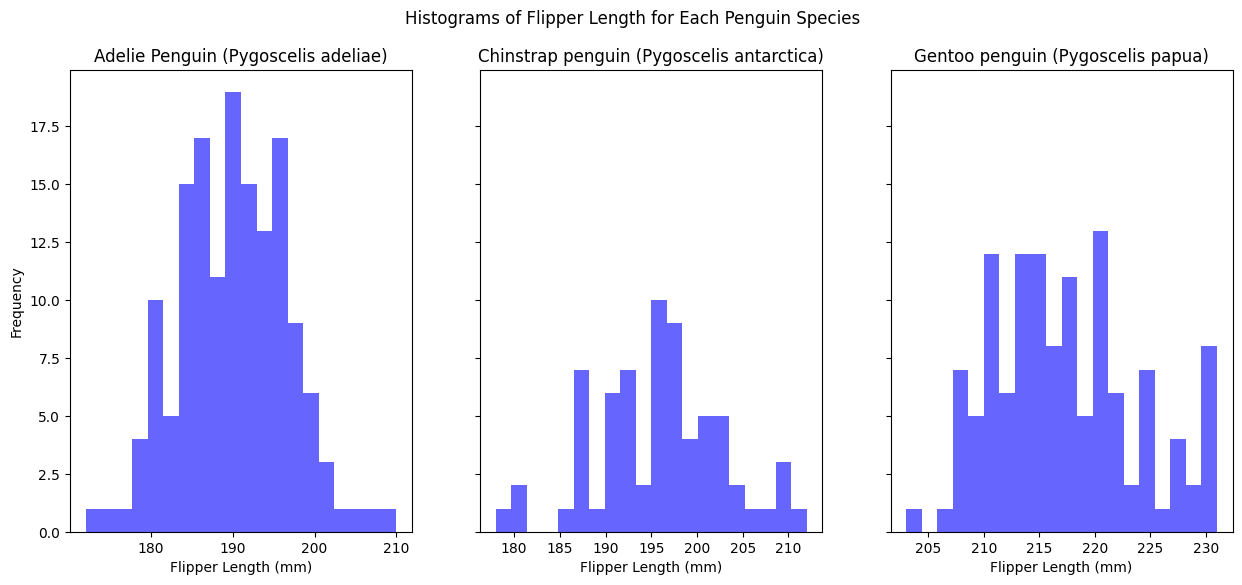

In [17]:
# Visualization 3: Histograms of Flipper Length for each species
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
for ax, species in zip(axes, species_list):
    species_data = penguins[penguins['Species'] == species]["Flipper Length (mm)"].dropna()
    ax.hist(species_data, bins=20, color="blue", alpha=0.6)
    ax.set_title(f"{species}")
    ax.set_xlabel("Flipper Length (mm)")
axes[0].set_ylabel("Frequency")
plt.suptitle("Histograms of Flipper Length for Each Penguin Species")
plt.show()

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode the 'Species' column numerically
le = LabelEncoder()
penguins1['Species_encoded'] = le.fit_transform(penguins1['Species'])

# List of numerical features
numerical_features = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]

# Compute correlation between each feature and the encoded species
correlations = penguins1[numerical_features + ['Species_encoded']].corr()['Species_encoded'].drop('Species_encoded')

# Sort correlations by absolute value
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Get the two best features
best_features = sorted_correlations.index[:2].tolist()

print("Correlation coefficients with Species:")
print(correlations)
print("\nTwo best quantitative features based on correlation:")
print(best_features)

Correlation coefficients with Species:
Culmen Length (mm)     0.731369
Culmen Depth (mm)     -0.744076
Flipper Length (mm)    0.854307
Body Mass (g)          0.750491
Name: Species_encoded, dtype: float64

Two best quantitative features based on correlation:
['Flipper Length (mm)', 'Body Mass (g)']


/tmp/ipython-input-130367272.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins1['Species_encoded'] = le.fit_transform(penguins1['Species'])


In [19]:
# Function to calculate separation score for a feature
def calculate_separation_score(feature):
    separation_score = 0
    for i in range(len(species_list)):
        for j in range(i + 1, len(species_list)):
            # Calculate the difference in medians between two species
            median_diff = abs(penguins[penguins['Species'] == species_list[i]][feature].median() -
                              penguins[penguins['Species'] == species_list[j]][feature].median())
            separation_score += median_diff
    return separation_score

# Calculate separation scores for all quantitative features
separation_scores = {}
for feature in quantitative_features:
    separation_scores[feature] = calculate_separation_score(feature)

# Sort features by separation score (higher score = better separation)
sorted_features = sorted(separation_scores.keys(), key=lambda x: separation_scores[x], reverse=True)

# Select the two best features
best_features = sorted_features[:2]

print("Separation scores for each feature:")
for feature, score in separation_scores.items():
    print(f"{feature}: {score}")

print("\nTwo best quantitative features based on boxplot separation:")
print(best_features)


Separation scores for each feature:
Culmen Length (mm): 21.5
Culmen Depth (mm): 6.899999999999999
Flipper Length (mm): 52.0
Body Mass (g): 2600.0

Two best quantitative features based on boxplot separation:
['Body Mass (g)', 'Flipper Length (mm)']


# Variables to use in model


In [22]:
# select only body mass and flipper length:
selected_features = ["Body Mass (g)", "Flipper Length (mm)"]

# Scaling the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test_cleaned)

# Encode Target variable
# Create a single LabelEncoder instance
encoder = LabelEncoder()

# Fit the encoder to the training data
encoder.fit(y_train)

# Transform both training and test data using the same fitted encoder
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)

# KNN Model

In [23]:
# Cross-Validation for KNN Model Selection

# Range of k values to test
k_values = list(range(1, 11, 2))

# store accuracy scores for each k
cv_scores = []

# perform cross-validation for each k
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train_scaled, y_train_encoded, cv=5, scoring='accuracy')
  cv_scores.append(scores.mean())

# find the optimal k
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal k: {optimal_k}")

Optimal k: 5


In [24]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the *cleaned* training data
knn.fit(X_train_scaled, y_train_encoded) # Changed line

# Make predictions on the *cleaned* test data
y_pred = knn.predict(X_test_scaled) # Changed line

# Evaluate the model using the encoded target
accuracy = accuracy_score(y_test_encoded, y_pred) # Changed line
print(f'KNN Accuracy: {accuracy:.4f}')

KNN Accuracy: 0.9275


# Logistic Regression Model

In [25]:
# Create logistic regression model
lr = LogisticRegression(random_state=42, max_iter=1000)  # random_state for reproducibility

# Fit the model on the scaled training data
lr.fit(X_train_scaled, y_train_encoded)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Evaluate the model using the encoded target
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Logistic Regression Accuracy for Test Data: {accuracy:.4f}')

Logistic Regression Accuracy for Test Data: 0.9710


# Support Vector Machine Model

In [26]:
C_values = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0] # example range

# create an SVM model
svm_model = SVC(kernel='linear')

# set up GridSearchCV
param_grid = {'C': C_values}
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# perform the grid search:
grid_search.fit(X_train_scaled, y_train_encoded)

# get the best C value
best_C = grid_search.best_params_['C']
print(f"Best C Value: {best_C}")

Best C Value: 5.0


In [27]:
# Create and train the SVM model
final_svm_model = SVC(kernel='linear', C=5.0)
final_svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = final_svm_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9710144927536232

Classification Report:
                                            precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.94      1.00      0.97        32
Chinstrap penguin (Pygoscelis antarctica)       1.00      0.88      0.93        16
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        21

                                 accuracy                           0.97        69
                                macro avg       0.98      0.96      0.97        69
                             weighted avg       0.97      0.97      0.97        69



In [28]:
# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


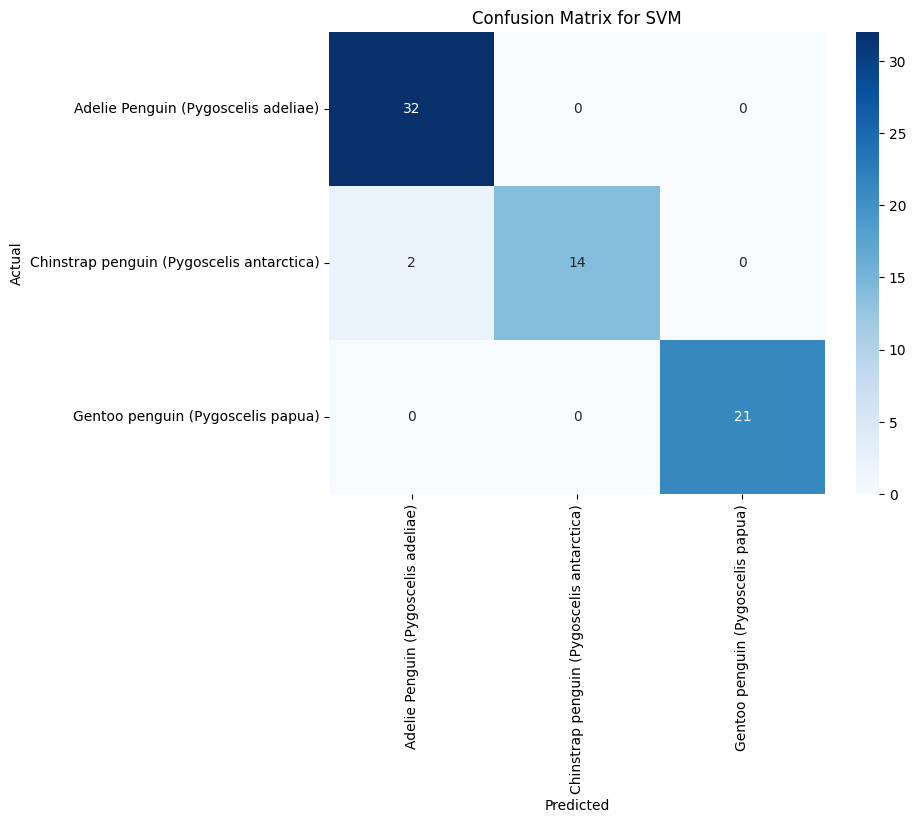

In [29]:
y_pred_svm = final_svm_model.predict(X_test_scaled)
plot_confusion_matrix(y_test, y_pred_svm, "Confusion Matrix for SVM")

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Function to plot decision regions
def plot_decision_regions(model, X, y, qualitative_feature, title, value, quantitative_features):
    """
    Plots decision regions for a given model and qualitative feature.
    """
    # Create a grid of points to evaluate the model
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision regions
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

    # Plot the data points
    for species in np.unique(y):
        plt.scatter(X[y == species][:, 0], X[y == species][:, 1],
                    label=species, edgecolor='k')

    # Add labels and title
    plt.xlabel(quantitative_features[0])
    plt.ylabel(quantitative_features[1])
    plt.title(f"{title} ({qualitative_feature}: {value})")
    plt.legend()
    plt.show()



X_filtered_scaled dtype: float64
y_filtered_encoded dtype: int64
X_filtered_scaled contains NaN: False
y_filtered_encoded contains NaN: False


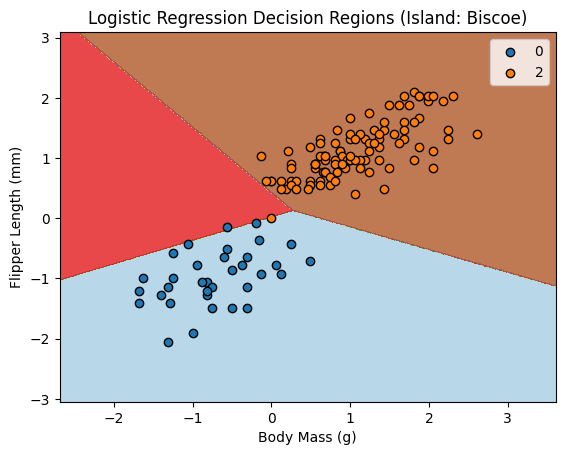

X_filtered_scaled dtype: float64
y_filtered_encoded dtype: int64
X_filtered_scaled contains NaN: False
y_filtered_encoded contains NaN: False


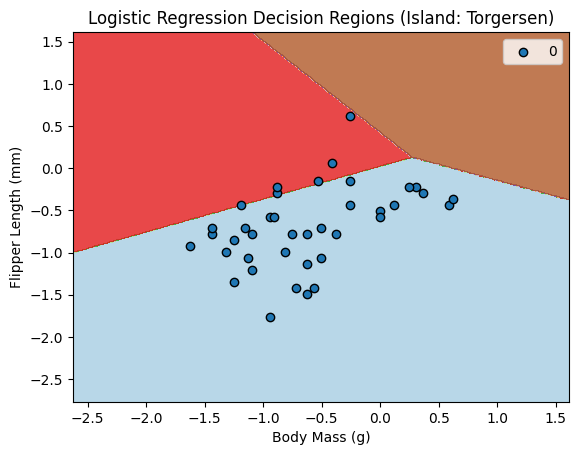

X_filtered_scaled dtype: float64
y_filtered_encoded dtype: int64
X_filtered_scaled contains NaN: False
y_filtered_encoded contains NaN: False


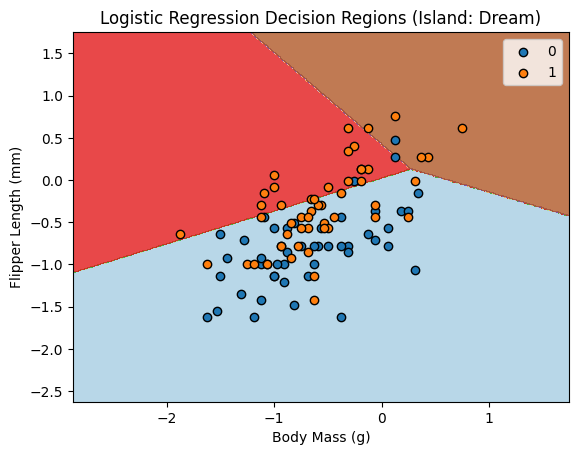

In [31]:
# Select features
quantitative_features = ['Body Mass (g)', 'Flipper Length (mm)']
qualitative_feature = 'Island'

# Handle missing values (impute)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train[quantitative_features]), columns=quantitative_features, index=X_train.index)
y_train_imputed = y_train.copy()

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Encode categorical labels in y_train_imputed
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_imputed)

# Train the model with increased max_iter
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train_encoded)

# Plot decision regions for each value of the qualitative feature
for value in X_train[qualitative_feature].unique():
    # Filter data for the current qualitative feature value
    mask = X_train[qualitative_feature] == value
    X_filtered = X_train_imputed[mask]
    y_filtered = y_train_imputed[mask]

    # Encode y_filtered
    y_filtered_encoded = le.transform(y_filtered)

    # Scale the filtered data
    X_filtered_scaled = scaler.transform(X_filtered)

    # Debugging: Check data types and contents
    print(f"X_filtered_scaled dtype: {X_filtered_scaled.dtype}")
    print(f"y_filtered_encoded dtype: {y_filtered_encoded.dtype}")
    print(f"X_filtered_scaled contains NaN: {np.isnan(X_filtered_scaled).any()}")
    print(f"y_filtered_encoded contains NaN: {np.isnan(y_filtered_encoded).any()}")

    # Plot decision regions
    plot_decision_regions(model, X_filtered_scaled, y_filtered_encoded, qualitative_feature,
                          title="Logistic Regression Decision Regions", value=value,
                          quantitative_features=quantitative_features)

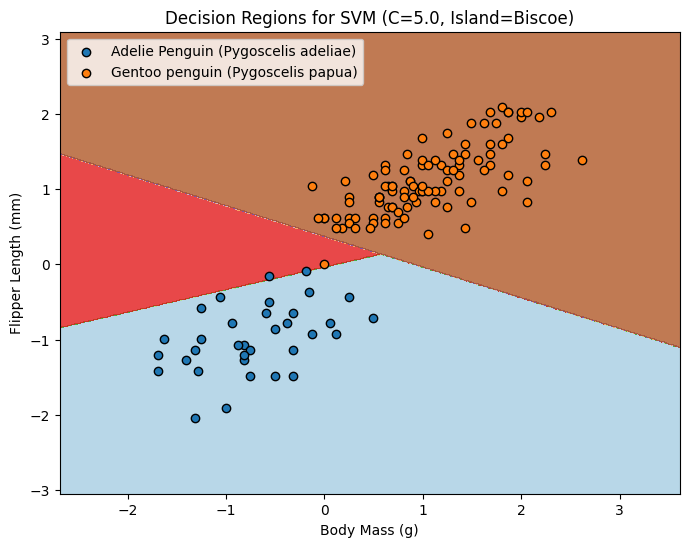

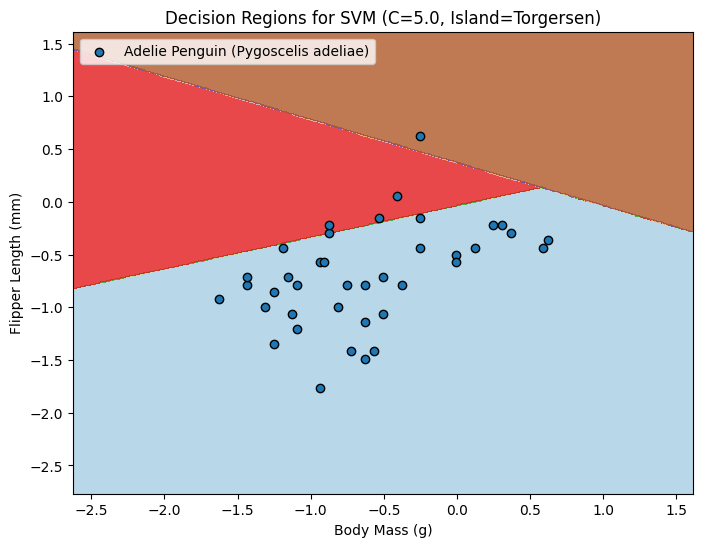

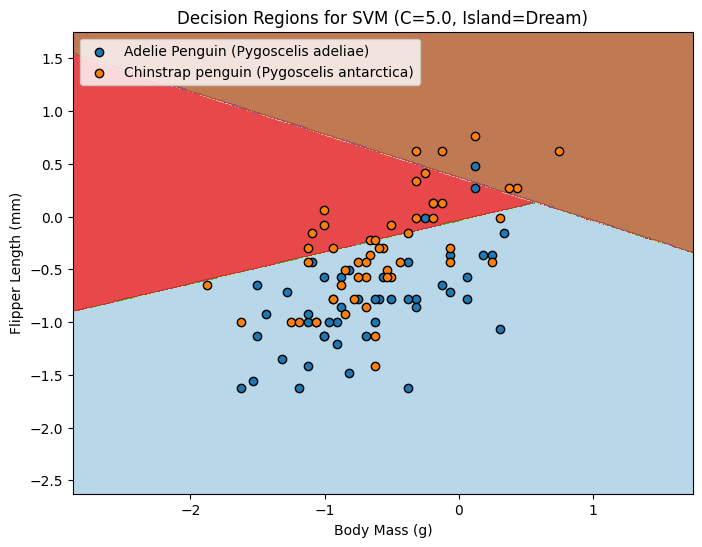

In [32]:
# Train the final SVM model with the best C value
final_svm_model = SVC(kernel='linear', C=best_C)
final_svm_model.fit(X_train_scaled, y_train_encoded)

# Plot decision regions for each island
for island in X_train[qualitative_feature].unique():
    # Filter data for the current island
    mask = X_train[qualitative_feature] == island
    X_filtered = X_train_imputed[mask]
    y_filtered = y_train_imputed[mask]

    # Scale the filtered data
    X_filtered_scaled = scaler.transform(X_filtered)

    # Encode y_filtered
    y_filtered_encoded = le.transform(y_filtered)

    # Create a grid of points to evaluate the model
    x_min, x_max = X_filtered_scaled[:, 0].min() - 1, X_filtered_scaled[:, 0].max() + 1
    y_min, y_max = X_filtered_scaled[:, 1].min() - 1, X_filtered_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the grid
    Z = final_svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision regions
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

    # Plot the data points
    for species in np.unique(y_filtered_encoded):
        plt.scatter(X_filtered_scaled[y_filtered_encoded == species][:, 0],
                    X_filtered_scaled[y_filtered_encoded == species][:, 1],
                    label=le.inverse_transform([species])[0], edgecolor='k')

    # Add labels and title
    plt.xlabel(quantitative_features[0])
    plt.ylabel(quantitative_features[1])
    plt.title(f"Decision Regions for SVM (C={best_C}, {qualitative_feature}={island})")
    plt.legend(loc='upper left')
    plt.show()

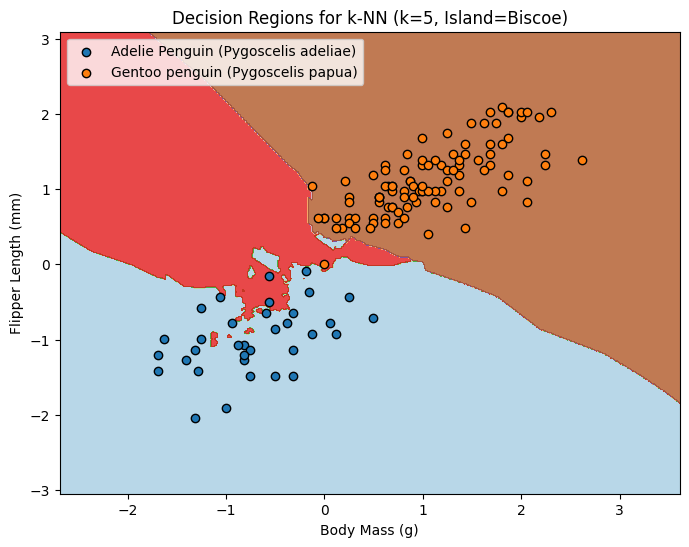

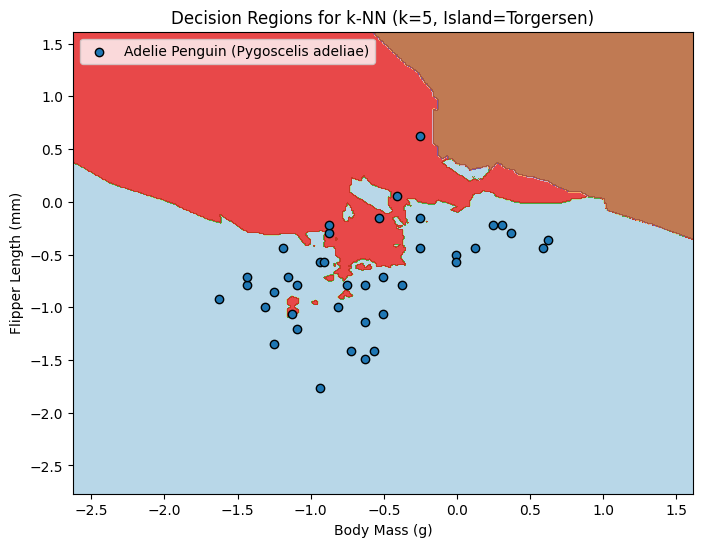

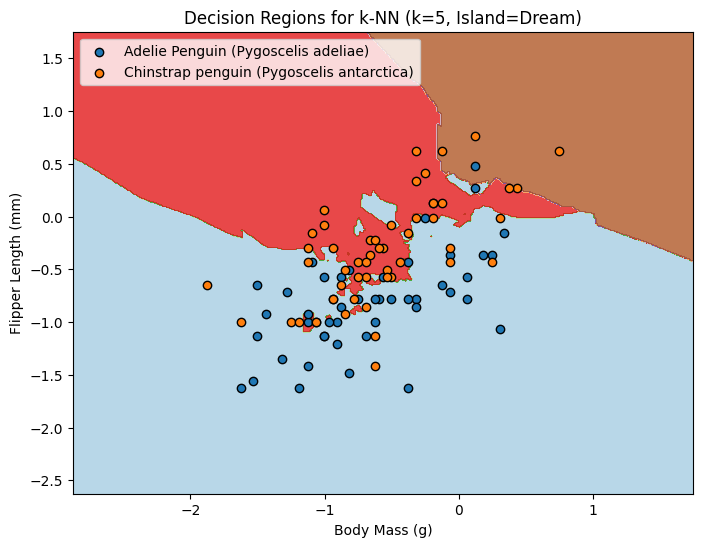

In [33]:
# Train the k-NN model with the optimal k value
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train_encoded)

# Plot decision regions for each island
for island in X_train[qualitative_feature].unique():
    # Filter data for the current island
    mask = X_train[qualitative_feature] == island
    X_filtered = X_train_imputed[mask]
    y_filtered = y_train_imputed[mask]

    # Scale the filtered data
    X_filtered_scaled = scaler.transform(X_filtered)

    # Encode y_filtered
    y_filtered_encoded = le.transform(y_filtered)

    # Create a grid of points to evaluate the model
    x_min, x_max = X_filtered_scaled[:, 0].min() - 1, X_filtered_scaled[:, 0].max() + 1
    y_min, y_max = X_filtered_scaled[:, 1].min() - 1, X_filtered_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the grid
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision regions
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

    # Plot the data points
    for species in np.unique(y_filtered_encoded):
        plt.scatter(X_filtered_scaled[y_filtered_encoded == species][:, 0],
                    X_filtered_scaled[y_filtered_encoded == species][:, 1],
                    label=le.inverse_transform([species])[0], edgecolor='k')

    # Add labels and title
    plt.xlabel(quantitative_features[0])
    plt.ylabel(quantitative_features[1])
    plt.title(f"Decision Regions for k-NN (k={optimal_k}, {qualitative_feature}={island})")
    plt.legend(loc='upper left')
    plt.show()